In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.cluster import KMeans, MiniBatchKMeans
from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn import metrics
import nltk
import gensim
import os
import string
import re
import os
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.cluster import DBSCAN
from sklearn.externals import joblib
import csv
import tweepy
import cnfg
import datetime
import quandl
import matplotlib.pyplot as plt
quandl.ApiConfig.api_key = '*****' 


pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_columns', None)

In [2]:
from pandas import DataFrame
import json
from pymongo import MongoClient


client = MongoClient(port=12345)
db = client.stocks


df = DataFrame(list(db.stocks.find({})))

In [3]:
df['user'] = 'stock_whisperer'

list1 = []
for i in range(len(df['text'])):
    list1.append(df['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(df['text'])):
    list2.append(se.str.split("b'")[i][1])
    
se2 = pd.Series(list2)
df['cleanedtext'] = se2.values

In [4]:
sandp100 = ['AAPL','ABBV','ABT','ACN','AGN','AIG','ALL','AMGN','AMZN','AXP','BA','BAC',
            'BIIB','BK','BLK','BMY','BRK.B','C','CAT','CELG','CL','CMCSA','COF','COP',
            'COST','CSCO','CVS','CVX','DD','DHR','DIS','DOW','DUK','EMR','EXC','F','FB',
            'FDX','FOX','FOXA','GD','GE','GILD','GM','GOOG','GOOGL','GS','HAL','HD','HON',
            'IBM','INTC','JNJ','JPM','KHC','KMI','KO','LLY','LMT','LOW','MA','MCD','MDLZ',
            'MDT','MET','MMM','MO','MON','MRK','MS','MSFT','NEE','NKE','ORCL','OXY','PCLN',
            'PEP','PFE','PG','PM','PYPL','QCOM','RTN','SBUX','SLB','SO','SPG','T','TGT',
            'TWX','TXN','UNH','UNP','UPS','USB','UTX','V','VZ','WBA','WFC','WMT','XOM']

sandp100find = ["XX'AAPL","XX'ABBV","XX'ABT","XX'ACN","XX'AGN","XX'AIG","XX'ALL","XX'AMGN",
                "XX'AMZN","XX'AXP","XX'BA","XX'BAC","XX'BIIB","XX'BK","XX'BLK","XX'BMY",
                "XX'BRK.B","XX'C","XX'CAT","XX'CELG","XX'CL","XX'CMCSA","XX'COF","XX'COP",
                "XX'COST","XX'CSCO","XX'CVS","XX'CVX","XX'DD","XX'DHR","XX'DIS","XX'DOW",
                "XX'DUK","XX'EMR","XX'EXC","XX'F","XX'FB","XX'FDX","XX'FOX","XX'FOXA","XX'GD",
                "XX'GE","XX'GILD","XX'GM","XX'GOOG","XX'GOOGL","XX'GS","XX'HAL","XX'HD","XX'HON",
                "XX'IBM","XX'INTC","XX'JNJ","XX'JPM","XX'KHC","XX'KMI","XX'KO","XX'LLY","XX'LMT",
                "XX'LOW","XX'MA","XX'MCD","XX'MDLZ","XX'MDT","XX'MET","XX'MMM","XX'MO","XX'MON",
                "XX'MRK","XX'MS","XX'MSFT","XX'NEE","XX'NKE","XX'ORCL","XX'OXY","XX'PCLN","XX'PEP",
                "XX'PFE","XX'PG","XX'PM","XX'PYPL","XX'QCOM","XX'RTN","XX'SBUX","XX'SLB","XX'SO",
                "XX'SPG","XX'T","XX'TGT","XX'TWX","XX'TXN","XX'UNH","XX'UNP","XX'UPS","XX'USB",
                "XX'UTX","XX'V","XX'VZ","XX'WBA","XX'WFC","XX'WMT","XX'XOM"]

sandp100lower = [element.lower() for element in sandp100]

In [5]:
df2 = df[df['cleanedtext'].str.contains("Whisper",na=False, case=False)]
df2 = df2[df2['cleanedtext'].str.contains('yester|from|Wisconsin|email|rocking', case=False)==False]
df2 = df2[df2['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]


In [6]:
import datetime as dt
df2['date'] = df2['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

In [7]:
df2 = df2.sort_values(by='date')
df3 = df2.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
df3 = df3.unstack()
df4 = df2.join(df3)
df5 = df4.reset_index()

for i in range(8, df5.shape[1]):
    df5.iloc[:,i] = df5.iloc[:,i].str.replace("XX'", '')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [8]:
stock_quan = pd.read_csv('WIKI_PRICES_1ef64a24111c5bc7e6a0a66f6e37080e.csv')
quanstocklist = list(stock_quan.ticker.unique())
quanstocklist.remove('AA')
quanstocklist.remove('ANF')
quanstocklist.remove('AMD')
quanstocklist.remove('FOSL')
quanstocklist.remove('TASR')

In [9]:
import copy
df6 = copy.copy(df5.iloc[:,:])
df7 = copy.copy(df5.iloc[:,:])
df8 = copy.copy(df5.iloc[:,:])
df9 = copy.copy(df5.iloc[:,:])

In [10]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(df5.iloc[:,7], df5.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=30)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
    #     print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
df5['return_one'] = se.values
df5['return_one'] = pd.to_numeric(df5['return_one'], errors='coerce')

In [11]:
se = pd.Series(link_to_api(9))
df6['return_one'] = se.values
df6['return_one'] = pd.to_numeric(df6['return_one'], errors='coerce')

se = pd.Series(link_to_api(10))
df7['return_one'] = se.values
df7['return_one'] = pd.to_numeric(df7['return_one'], errors='coerce')

se = pd.Series(link_to_api(11))
df8['return_one'] = se.values
df8['return_one'] = pd.to_numeric(df8['return_one'], errors='coerce')

se = pd.Series(link_to_api(12))
df9['return_one'] = se.values
df9['return_one'] = pd.to_numeric(df9['return_one'], errors='coerce')

In [12]:
#SHARPE VALUE
print((df5['return_one'].mean())/(df5['return_one'].std()) * np.sqrt(12))
print((df6['return_one'].mean())/(df6['return_one'].std()) * np.sqrt(12))
print((df7['return_one'].mean())/(df7['return_one'].std()) * np.sqrt(12))
print((df8['return_one'].mean())/(df8['return_one'].std()) * np.sqrt(12))
print((df9['return_one'].mean())/(df9['return_one'].std()) * np.sqrt(12))

0.519161500969
0.353223982367
0.00856323565547
-0.614858440858
0.168537182278


**SECOND USER**

In [13]:
dfstockstotrade = DataFrame(list(db.stockstotrade.find({})))

In [14]:
dfstockstotrade['user'] = 'stockstotrade'

In [15]:
list1 = []
for i in range(len(dfstockstotrade['text'])):
    list1.append(dfstockstotrade['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(dfstockstotrade['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
dfstockstotrade['cleanedtext'] = se2.values

In [16]:
dfstockstotrade = dfstockstotrade[dfstockstotrade['cleanedtext'].str.contains('RT|@', case=False)==False]
dfstockstotrade = dfstockstotrade[dfstockstotrade['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]



In [17]:
import datetime as dt
dfstockstotrade['date'] = dfstockstotrade['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

In [18]:
dfstockstotrade = dfstockstotrade.sort_values(by='date')
dfstockstotradeextract = dfstockstotrade.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
dfstockstotradeextract = dfstockstotradeextract.unstack()
dfstockstotrade = dfstockstotrade.join(dfstockstotradeextract)
dfstockstotrade = dfstockstotrade.reset_index()

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [19]:
for i in range(8, dfstockstotrade.shape[1]):
    dfstockstotrade.iloc[:,i] = dfstockstotrade.iloc[:,i].str.replace("XX'", '')

In [20]:
dfstockstotradept2 = copy.copy(dfstockstotrade.iloc[:,:])
dfstockstotradept3 = copy.copy(dfstockstotrade.iloc[:,:])
dfstockstotradept4 = copy.copy(dfstockstotrade.iloc[:,:])
dfstockstotradept5 = copy.copy(dfstockstotrade.iloc[:,:])

dfstockstotrade = dfstockstotrade[(dfstockstotrade['date']>datetime.date(2010,9,12)) & (dfstockstotrade['date']<datetime.date(2017,5,1))]
dfstockstotradept2 = dfstockstotradept2[(dfstockstotradept2['date']>datetime.date(2010,9,12)) & (dfstockstotradept2['date']<datetime.date(2017,5,1))]
dfstockstotradept3 = dfstockstotradept3[(dfstockstotradept3['date']>datetime.date(2010,9,12)) & (dfstockstotradept3['date']<datetime.date(2017,5,1))]
dfstockstotradept4 = dfstockstotradept4[(dfstockstotradept4['date']>datetime.date(2010,9,12)) & (dfstockstotradept4['date']<datetime.date(2017,5,1))]
dfstockstotradept5 = dfstockstotradept5[(dfstockstotradept5['date']>datetime.date(2010,9,12)) & (dfstockstotradept5['date']<datetime.date(2017,5,1))]


In [21]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(dfstockstotrade.iloc[:,7], dfstockstotrade.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=30)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
dfstockstotrade['return_one'] = se.values
dfstockstotrade['return_one'] = pd.to_numeric(dfstockstotrade['return_one'], errors='coerce')

In [22]:
se = pd.Series(link_to_api(9))
dfstockstotradept2['return_one'] = se.values
dfstockstotradept2['return_one'] = pd.to_numeric(dfstockstotradept2['return_one'], errors='coerce')

# se = pd.Series(link_to_api(10))
# dfstockstotradept3['return_one'] = se.values
# dfstockstotradept3['return_one'] = pd.to_numeric(dfstockstotradept3['return_one'], errors='coerce')

se = pd.Series(link_to_api(11))
dfstockstotradept4['return_one'] = se.values
dfstockstotradept4['return_one'] = pd.to_numeric(dfstockstotradept4['return_one'], errors='coerce')

se = pd.Series(link_to_api(12))
dfstockstotradept5['return_one'] = se.values
dfstockstotradept5['return_one'] = pd.to_numeric(dfstockstotradept5['return_one'], errors='coerce')

In [23]:
#SHARPE VALUE
print((dfstockstotrade['return_one'].mean())/(dfstockstotrade['return_one'].std()) * np.sqrt(12))
print((dfstockstotradept2['return_one'].mean())/(dfstockstotradept2['return_one'].std()) * np.sqrt(12))
# print((dfstockstotradept3['return_one'].mean())/(dfstockstotradept3['return_one'].std()) * np.sqrt(12))
print((dfstockstotradept4['return_one'].mean())/(dfstockstotradept4['return_one'].std()) * np.sqrt(12))
print((dfstockstotradept5['return_one'].mean())/(dfstockstotradept5['return_one'].std()) * np.sqrt(12))


0.00841591290565
-0.573781320856
-0.574791095905
-1.42960714661


**THIRD USER**

In [24]:
candidbanter = DataFrame(list(db.candidbanter.find({})))
candidbanter['user'] = 'candidbanter'

In [25]:
list1 = []
for i in range(len(candidbanter['text'])):
    list1.append(candidbanter['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(candidbanter['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
candidbanter['cleanedtext'] = se2.values

In [26]:
candidbanter = candidbanter[candidbanter['cleanedtext'].str.contains('RT|@', case=False)==False]
candidbanter = candidbanter[candidbanter['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]




In [27]:
candidbanter['date'] = candidbanter['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

In [28]:
candidbanter = candidbanter.sort_values(by='date')
candidbanterextract = candidbanter.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
candidbanterextract = candidbanterextract.unstack()
candidbanter = candidbanter.join(candidbanterextract)
candidbanter = candidbanter.reset_index()

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [29]:
for i in range(8, candidbanter.shape[1]):
    candidbanter.iloc[:,i] = candidbanter.iloc[:,i].str.replace("XX'", '')

In [30]:
candidbanter = candidbanter[(candidbanter['date']>datetime.date(2014,9,12)) & (candidbanter['date']<datetime.date(2017,5,1))]

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = (analyser.polarity_scores(sentence)['compound'])
    return snt

In [32]:
listcandid = []
for i in candidbanter.cleanedtext:
    listcandid.append(print_sentiment_scores(i))

se3 = pd.Series(listcandid)
candidbanter['compound'] = se3.values

In [33]:
candidbanter = candidbanter[candidbanter['compound'] > 0.25]
candidbanter.drop(['compound'], axis=1, inplace=True)

In [34]:
candidbanter2 = copy.copy(candidbanter.iloc[:,:])
candidbanter3 = copy.copy(candidbanter.iloc[:,:])
candidbanter4 = copy.copy(candidbanter.iloc[:,:])
candidbanter5 = copy.copy(candidbanter.iloc[:,:])

In [35]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(candidbanter.iloc[:,7], candidbanter.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=30)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
candidbanter['return_one'] = se.values
candidbanter['return_one'] = pd.to_numeric(candidbanter['return_one'], errors='coerce')

In [36]:

se = pd.Series(link_to_api(9))
candidbanter2['return_one'] = se.values
candidbanter2['return_one'] = pd.to_numeric(candidbanter2['return_one'], errors='coerce')

se = pd.Series(link_to_api(10))
candidbanter3['return_one'] = se.values
candidbanter3['return_one'] = pd.to_numeric(candidbanter3['return_one'], errors='coerce')

se = pd.Series(link_to_api(11))
candidbanter4['return_one'] = se.values
candidbanter4['return_one'] = pd.to_numeric(candidbanter4['return_one'], errors='coerce')

se = pd.Series(link_to_api(12))
candidbanter5['return_one'] = se.values
candidbanter5['return_one'] = pd.to_numeric(candidbanter5['return_one'], errors='coerce')


In [37]:
#SHARPE VALUE
print((candidbanter['return_one'].mean())/(candidbanter['return_one'].std()) * np.sqrt(12))
print((candidbanter2['return_one'].mean())/(candidbanter2['return_one'].std()) * np.sqrt(12))
print((candidbanter3['return_one'].mean())/(candidbanter3['return_one'].std()) * np.sqrt(12))
print((candidbanter4['return_one'].mean())/(candidbanter4['return_one'].std()) * np.sqrt(12))
print((candidbanter5['return_one'].mean())/(candidbanter5['return_one'].std()) * np.sqrt(12))

-0.257046378977
0.628783987627
0.354326374678
0.265346394321
-0.954620853708


**FOURTH USER**

In [38]:
triggeroftheday = DataFrame(list(db.triggeroftheday.find({})))
triggeroftheday['user'] = 'triggeroftheday'

In [39]:
list1 = []
for i in range(len(triggeroftheday['text'])):
    list1.append(triggeroftheday['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(triggeroftheday['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
triggeroftheday['cleanedtext'] = se2.values

In [40]:
triggeroftheday = triggeroftheday[triggeroftheday['cleanedtext'].str.contains('RT|@|closed|yesterday', case=False)==False]
triggeroftheday = triggeroftheday[triggeroftheday['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]




In [41]:
triggeroftheday['date'] = triggeroftheday['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

In [42]:
triggeroftheday = triggeroftheday.sort_values(by='date')
triggerofthedayextract = triggeroftheday.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
triggerofthedayextract = triggerofthedayextract.unstack()
triggeroftheday = triggeroftheday.join(triggerofthedayextract)
triggeroftheday = triggeroftheday.reset_index()

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [43]:
for i in range(8, triggeroftheday.shape[1]):
    triggeroftheday.iloc[:,i] = triggeroftheday.iloc[:,i].str.replace("XX'", '')

In [44]:
triggeroftheday = triggeroftheday[(triggeroftheday['date']>datetime.date(2010,9,12)) & (triggeroftheday['date']<datetime.date(2017,5,1))]

In [45]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(triggeroftheday.iloc[:,7], triggeroftheday.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=30)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
triggeroftheday['return_one'] = se.values
triggeroftheday['return_one'] = pd.to_numeric(triggeroftheday['return_one'], errors='coerce')

In [46]:
#SHARPE VALUE
(triggeroftheday['return_one'].mean())/(triggeroftheday['return_one'].std()) * np.sqrt(12)

0.8064324632318659

**ICAHN**

In [47]:
icahn = DataFrame(list(db.icahn.find({})))
icahn['user'] = 'icahn'

In [48]:
list1 = []
for i in range(len(icahn['text'])):
    list1.append(icahn['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(icahn['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
icahn['cleanedtext'] = se2.values

In [49]:
icahn = icahn[icahn['cleanedtext'].str.contains('RT|@|closed|yesterday', case=False)==False]
icahn = icahn[icahn['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]




In [50]:
icahn['date'] = icahn['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

In [51]:
icahn = icahn.sort_values(by='date')
icahnextract = icahn.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
icahnextract = icahnextract.unstack()
icahn = icahn.join(icahnextract)
icahn = icahn.reset_index()

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [52]:
for i in range(8, icahn.shape[1]):
    icahn.iloc[:,i] = icahn.iloc[:,i].str.replace("XX'", '')

In [53]:
icahn = icahn[(icahn['date']>datetime.date(2010,9,12)) & (icahn['date']<datetime.date(2017,5,1))]

In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = (analyser.polarity_scores(sentence)['compound'])
    return snt

In [55]:
listicahn = []
for i in icahn.cleanedtext:
    listicahn.append(print_sentiment_scores(i))

se3 = pd.Series(listicahn)
icahn['compound'] = se3.values

In [56]:
icahn = icahn[icahn['compound'] > 0.0]
icahn.drop(['compound'], axis=1, inplace=True)

In [57]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(icahn.iloc[:,7], icahn.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
icahn['return_one'] = se.values
icahn['return_one'] = pd.to_numeric(icahn['return_one'], errors='coerce')

In [58]:
#SHARPE VALUE
(icahn['return_one'].mean() - .00109)/(icahn['return_one'].std()) * np.sqrt(252)

2.0825901114473022

**Peter Warren**

In [100]:
peterw = DataFrame(list(db.peterw.find({})))
peterw['user'] = 'peterw'

In [102]:
list1 = []
for i in range(len(peterw['text'])):
    list1.append(peterw['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(peterw['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
peterw['cleanedtext'] = se2.values

In [103]:
peterw = peterw[peterw['cleanedtext'].str.contains('RT|@|closed|yesterday', case=False)==False]
peterw = peterw[peterw['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]


peterw['date'] = peterw['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

peterw = peterw.sort_values(by='date')
peterwextract = peterw.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
peterwextract = peterwextract.unstack()
peterw = peterw.join(peterwextract)
peterw = peterw.reset_index()


for i in range(8, peterw.shape[1]):
    peterw.iloc[:,i] = peterw.iloc[:,i].str.replace("XX'", '')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [104]:
peterw = peterw[(peterw['date']>datetime.date(2010,9,12)) & (peterw['date']<datetime.date(2017,5,1))]

In [105]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = (analyser.polarity_scores(sentence)['compound'])
    return snt


listpeterw = []
for i in peterw.cleanedtext:
    listpeterw.append(print_sentiment_scores(i))

se3 = pd.Series(listpeterw)
peterw['compound'] = se3.values


peterw = peterw[peterw['compound'] > 0.1]
peterw.drop(['compound'], axis=1, inplace=True)

In [106]:
peterw = peterw[peterw.iloc[:,8] != 'UA']

In [107]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(peterw.iloc[:,7], peterw.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
peterw['return_one'] = se.values
peterw['return_one'] = pd.to_numeric(peterw['return_one'], errors='coerce')

In [108]:
#SHARPE VALUE
(peterw['return_one'].mean() - .00109)/(peterw['return_one'].std()) * np.sqrt(252)

1.3961502195272659

**BERGEN CAPITAL**

In [77]:
bergencapital = DataFrame(list(db.bergencapital.find({})))
bergencapital['user'] = 'bergencapital'

In [78]:
list1 = []
for i in range(len(bergencapital['text'])):
    list1.append(bergencapital['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(bergencapital['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
bergencapital['cleanedtext'] = se2.values

In [79]:
bergencapital = bergencapital[bergencapital['cleanedtext'].str.contains('RT|@|closed|yesterday', case=False)==False]
bergencapital = bergencapital[bergencapital['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]


bergencapital['date'] = bergencapital['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

bergencapital = bergencapital.sort_values(by='date')
bergencapitalextract = bergencapital.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
bergencapitalextract = bergencapitalextract.unstack()
bergencapital = bergencapital.join(bergencapitalextract)
bergencapital = bergencapital.reset_index()


for i in range(8, bergencapital.shape[1]):
    bergencapital.iloc[:,i] = bergencapital.iloc[:,i].str.replace("XX'", '')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [80]:
bergencapital = bergencapital[(bergencapital['date']>datetime.date(2010,9,12)) & (bergencapital['date']<datetime.date(2017,5,1))]

In [81]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = (analyser.polarity_scores(sentence)['compound'])
    return snt


listbergencapital = []
for i in bergencapital.cleanedtext:
    listbergencapital.append(print_sentiment_scores(i))

se3 = pd.Series(listbergencapital)
bergencapital['compound'] = se3.values


bergencapital = bergencapital[bergencapital['compound'] > 0.2]
bergencapital.drop(['compound'], axis=1, inplace=True)

In [82]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(bergencapital.iloc[:,7], bergencapital.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
bergencapital['return_one'] = se.values
bergencapital['return_one'] = pd.to_numeric(bergencapital['return_one'], errors='coerce')

In [450]:
#SHARPE VALUE
(bergencapital['return_one'].mean() - .00109)/(bergencapital['return_one'].std()) * np.sqrt(252)

0.9988352976772682

**MERGING**

In [352]:
finviz = pd.read_csv('finviz.csv')

In [353]:
finviz = finviz.iloc[:,[1,3,4,5]]
df10 = df5.iloc[:,[5,8,17]]
df62 = df6.iloc[:,[5,8,17]]
df72 = df7.iloc[:,[5,8,17]]
df82 = df8.iloc[:,[5,8,17]]
df92 = df9.iloc[:,[5,8,17]]

dfstockstotrade10 = dfstockstotrade.iloc[:,[5,8,21]]
dfstockstotradept22= dfstockstotradept2.iloc[:,[5,8,21]]
# dfstockstotradept23= dfstockstotradept3.iloc[:,[5,8,21]]
dfstockstotradept24= dfstockstotradept4.iloc[:,[5,8,21]]
dfstockstotradept25= dfstockstotradept5.iloc[:,[5,8,21]]



candidbanter10 = candidbanter.iloc[:,[5,8,17]]
candidbanter22 = candidbanter2.iloc[:,[5,8,17]]
candidbanter32 = candidbanter3.iloc[:,[5,8,17]]
candidbanter42 = candidbanter4.iloc[:,[5,8,17]]
candidbanter52 = candidbanter5.iloc[:,[5,8,17]]

peterw10 = peterw.iloc[:,[5,8,14]]

bergencapital10 = bergencapital.iloc[:,[5,8,14]]

icahn10 = icahn.iloc[:,[5,8,10]]


triggeroftheday10 = triggeroftheday.iloc[:,[5,8,9]]


In [354]:
newdf = df10.append(dfstockstotrade10)
newdf = newdf.append(df62)
newdf = newdf.append(df72)
newdf = newdf.append(df82)
newdf = newdf.append(df92)
newdf = newdf.append(dfstockstotradept22)
# newdf = newdf.append(dfstockstotradept23)
newdf = newdf.append(dfstockstotradept24)
newdf = newdf.append(dfstockstotradept25)


newdf = newdf.append(candidbanter10)
newdf = newdf.append(candidbanter22)
newdf = newdf.append(candidbanter32)
newdf = newdf.append(candidbanter42)
newdf = newdf.append(candidbanter52)

newdf = newdf.append(triggeroftheday10)


newdf = newdf.append(icahn10)


newdf=newdf.append(peterw10)

newdf = newdf.append(bergencapital10)



column_names = ['user', 'Ticker', 'return_one']
newdf.columns = column_names

In [355]:
newdf = newdf.merge(finviz, on='Ticker', how='left')

In [356]:
# newdf.drop(['Ticker'], axis=1, inplace=True)

**Manipulate for ML**

In [357]:
import patsy
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [358]:
def onehotencode(column_name):
    global newdf
    st = patsy.dmatrix(column_name,
                     data=newdf,
                     return_type='dataframe')
    newdf.drop([column_name], axis=1, inplace=True)
    newdf = newdf.join(st)
    newdf.drop(['Intercept'], axis=1, inplace=True)
    return newdf

newdf = onehotencode('Sector')
newdf = onehotencode('Industry')
newdf = onehotencode('Country')
newdf = onehotencode('Ticker')
newdf = onehotencode('user')

In [359]:
newdf = newdf.dropna()

In [360]:
newdf.columns = newdf.columns.map(lambda x: x.replace('[', '_'))
newdf.columns = newdf.columns.map(lambda x: x.replace(']', ''))
newdf.columns = newdf.columns.map(lambda x: x.replace('.', ''))

**Train/Test/Split**

In [361]:
Y_target= newdf.iloc[:,0]
newdf.drop(['return_one'], axis=1, inplace=True)
X_data = newdf

In [362]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# The train-test split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_target, 
                                                    test_size=.4, random_state=42)

**KMeans**

In [447]:
km = KMeans(n_clusters=10)
km.fit(X_train)
y_pred = km.predict(X_test)
km.score(X_test)

-872.52238266996142

**XGBoost Regressor**

In [431]:
import xgboost
from xgboost import XGBRegressor
from xgboost import plot_tree

In [377]:
model = xgboost.XGBRegressor(objective = "reg:linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_data)

In [378]:
ypred2 = model.predict(X_test)


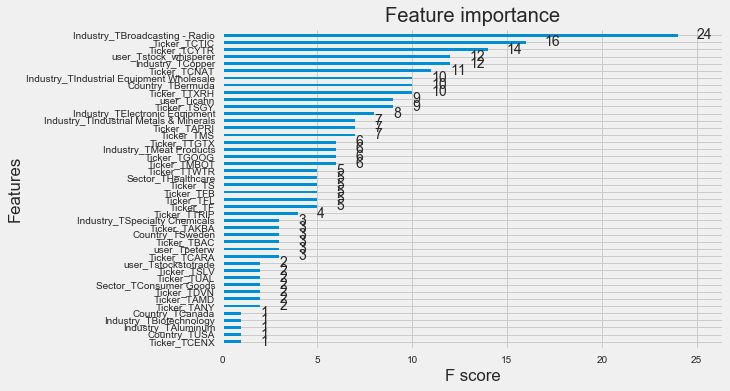

In [379]:
plt.style.use('fivethirtyeight')
xgboost.plot_importance(model, height = 0.4)

In [395]:
from sklearn import linear_model, datasets, metrics
print ('MSE', np.sqrt(metrics.mean_squared_error(y_test, ypred2)))
print('Test:', model.score(X_test, y_test))


MSE 0.00819168156614
Test: 0.0622825375415


In [384]:
newdff = pd.DataFrame()

In [385]:
newdff['score'] = y_pred

In [386]:
newdff['og'] = Y_target

**Linear Regression**

In [373]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_target, test_size=0.3)
reg.fit(X_train, y_train)
print('Test:', reg.score(X_test, y_test))
y_pred = reg.predict(X_test)
print ('MSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test: -8.7427468674e+24
MSE: 25012725212.1


**Polynomial Linear Regression**

In [401]:
from sklearn.preprocessing import PolynomialFeatures

degree = 1
pf = PolynomialFeatures(degree=degree)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)

lr = LinearRegression()
lr = lr.fit(X_train_pf, y_train)

y_pred = lr.predict(X_test_pf)
print('MSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Score', lr.score(X_test_pf, y_test))


MSE: 30431547748.9
-1.2941182522e+25


**Ridge Regression**

In [428]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(cv=5)
rcv.fit(X_train, y_train)
print(rcv.score(X_test, y_test))
y_pred = rcv.predict(X_test)
print('MSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.0603147549969
MSE: 0.00820027210696


**RANDOM FOREST REGRESSOR**

In [412]:
from sklearn.ensemble import RandomForestRegressor

In [429]:
rfr = RandomForestRegressor(max_depth=100)
rfr.fit(X_train, y_train)
print(rfr.score(X_test, y_test))
y_pred = rfr.predict(X_test)
print('MSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


0.00450204661356
MSE: 0.00844028760618


**SVC**

In [452]:
from sklearn.svm import LinearSVC

In [3]:
svc = LinearSVC()
svc.fit(X_train, y_train)
print(svc.score(X_test, y_test))
y_pred = svc.predict(X_test)
print('MSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))